Importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

Loading the dataset(Mnist)

In [2]:
mnist = tf.keras.datasets.mnist

Splitting and normalizing the values

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data() 
x_train = tf.keras.utils.normalize(x_train,axis = 1)
x_test = tf.keras.utils.normalize(x_test,axis = 1)

Creating the keras model

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(50,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(50,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

Fitting the training dataset

In [5]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.fit(x_train,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3610 - accuracy: 0.8961
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1651 - accuracy: 0.9495
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1198 - accuracy: 0.9623
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0944 - accuracy: 0.9703
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0761 - accuracy: 0.9759


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 42310 (165.27 KB)
Trainable params: 42310 (165.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Predicting the accuracy and loss

In [7]:
val_loss,val_acc = model.evaluate(x_test,y_test)
print("Loss:",val_loss,"Accuracy:",val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1126 - accuracy: 0.9666
Loss: 0.1125902310013771 Accuracy: 0.9666000008583069


Predicting on the test dataset

In [8]:
predictions = model.predict([x_test])

313/313 [==============================] - 1s 2ms/step


In [9]:
print(predictions)

[[1.8218000e-08 4.9612958e-09 9.1962735e-05 ... 9.9980003e-01
  8.9560302e-07 1.5005869e-06]
 [1.4932683e-10 1.1861409e-05 9.9998653e-01 ... 1.5407615e-09
  2.3482967e-07 8.0659324e-13]
 [2.4196448e-08 9.9971944e-01 1.9073101e-05 ... 5.2786465e-05
  1.8048519e-04 2.6740663e-06]
 ...
 [4.8509555e-08 5.5327246e-07 1.6290963e-08 ... 1.0927217e-04
  6.8205873e-06 5.5240752e-04]
 [4.0423165e-06 1.6017873e-07 5.4404801e-08 ... 4.1976193e-08
  1.3579085e-03 2.4044194e-08]
 [9.5671094e-06 3.9846193e-09 3.5549954e-07 ... 1.3087803e-09
  2.0049018e-07 5.7352223e-10]]


Printing a random prediction out of the prediction list

In [10]:
print(np.argmax(predictions[7]))

9


Plotting the predicted number

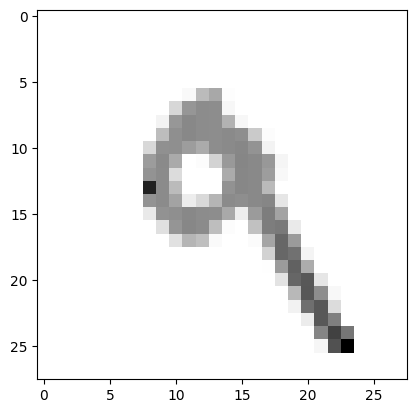

In [11]:
plt.imshow(x_test[7],cmap = plt.cm.binary)
plt.show()